# 2. 월급 변수 검토 및 전처리하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
welfare = pd.read_csv('./data/koweps_hpwc14_2019_beta2_step_02.csv')
welfare['sex'].head()

0    female
1      male
2      male
3      male
4    female
Name: sex, dtype: object

In [3]:
# 1) 변수 검토하기
# 코드북을 보면 월급은 '일한 달의 평균 임금'을 의미하며 1만원 단위로 기록.
# 변수 이름은 income.
# 성별은 범주 변수이므로 df.value_count()를 이용해 범주별 빈도를 확인하면 특징을 파악할 수 있음.
# 하지만 월급은 연속 변수이므로 df.value_count()을 이용하면 너무 많은 항목이 출력되어 알아보기 어려움.
# 연소 변수는 df.describe()로 요약 통계량을 확인해야 특징을 파악할 수 있음.
welfare['income'].dtypes

dtype('float64')

In [4]:
welfare['income'].describe()  # 요약 통계량 구하기

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

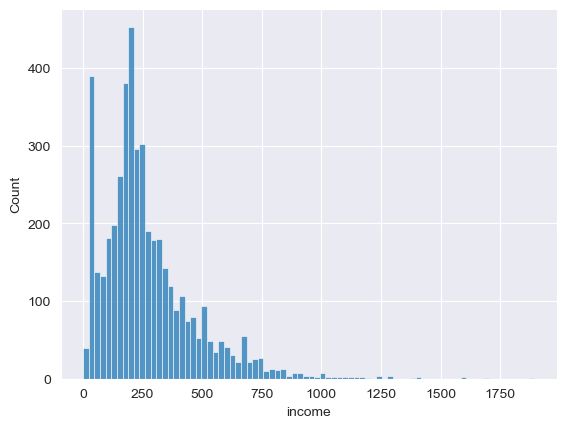

In [6]:
# 출력 결과를 보면 float65 타입이고, 0 ~ 1,892만원의 값을 지님.
# 150 ~ 345 만원에 가장 많이 분포하고 평균은 268만원, 중앙값은 평균보다 작은 220만원으로
# 전반적으로 낮은 쪽에 치우침. -> 월급이 평균값보다 낮은 사람이 50% 이상

# 히스토그램을 만들어 분포를 확인
sns.histplot(data=welfare, x='income')  # 히스토그램 만들기
plt.show()

In [7]:
# 2) 전처리 하기
# 코드북을 보면 월급은 만원 단위로 되어 있고, '모름/무응답'은 9999

welfare['income'].describe()  # 이상치 확인

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [8]:
welfare['income'].isna().sum()  # 결측치 확인 14418

9884

In [9]:
# 출력 결과를 보면 최소값은 0 ~ 1,892이고 결측치 9,884개가 있음.
# 즉 9999가 입력된 데이터는 없음.
# 이상치를 결측 처리하는 절차를 건너뛰어도 됨.

# 만약 9999인 항목이 있다면 아래와 같이 이상치를 결측 처리하는 절차를 거쳐야 됨.
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [11]:
# 결측치 확인
print(welfare['income'].isna().sum())

9884
